# We will import the dataset of the titanic here below

In [327]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# WE WILL CLEAN THE DATA

as we can from above in the column(Cabin) we have some null values so we will see if we have any null values anywhere else

In [328]:
df.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [329]:
df.describe().round(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


It shows that we have null values in 3 categories (age,cabin and embarked).Let's now see how many null values does those 3 categories have

In [330]:
df['Age'].isnull().sum()

177

In [331]:
df['Cabin'].isnull().sum()

687

In [332]:
df['Embarked'].isnull().sum()

2

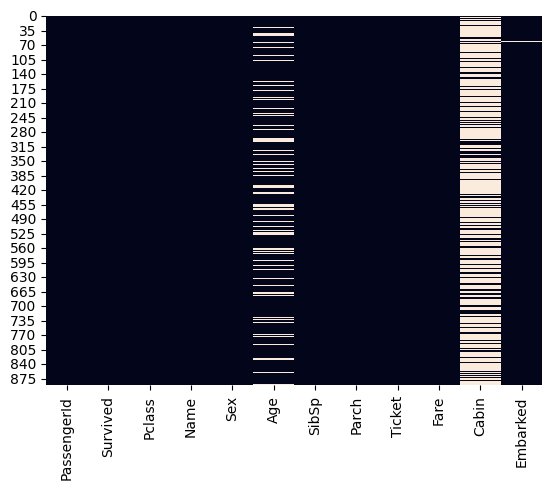

In [333]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

We can fill the null values of the age with 2 good methods:

* Mean : but our data must follow the symmetric distribution

* Median : if our data doesn't follow the symmetric distribution

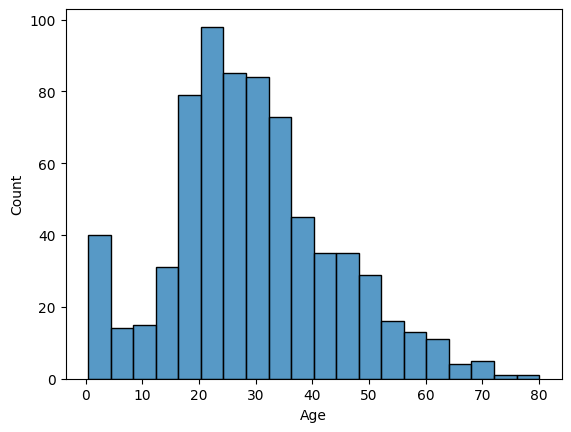

In [334]:
sns.histplot(df['Age'])
plt.show()

Since the plot doesn't follow the symmetric distribution we will fill the null values of the **AGE** column with the ***median of the AGE***





In [335]:
df['Age'] = df['Age'].fillna(df['Age'].median())


we will plot again the heatmap of the missing values

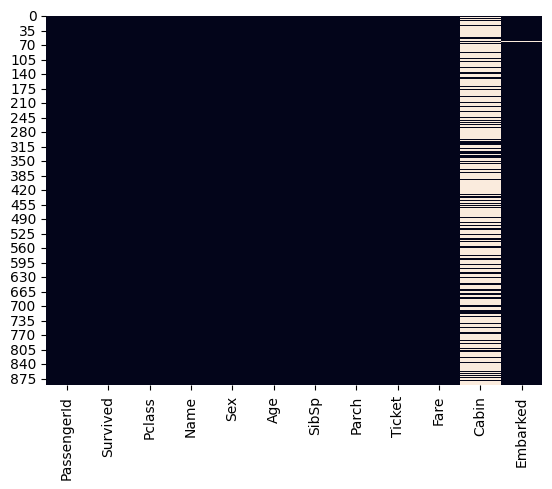

In [336]:
sns.heatmap(df.isnull(),cbar = False)
plt.show()

In [337]:
df['Age'].describe()

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [338]:
completed_values = sum(df['Cabin'].value_counts())/len(df['Cabin'])

round(completed_values,2)


0.23

As we can see only the 23% of the values are completed in the column [Cabin] so i have decided to drop this column

In [339]:
df = df.drop('Cabin',axis = 1)

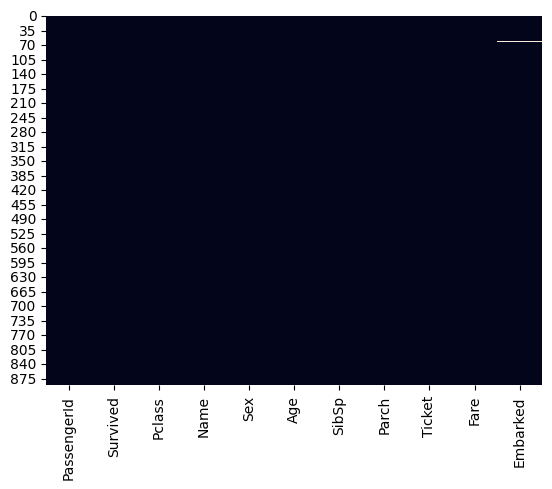

In [340]:
sns.heatmap(df.isnull(),cbar = False)
plt.show()

In [341]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [342]:
df['Embarked'] = df['Embarked'].fillna('S')

In [343]:
sex = pd.get_dummies(df['Sex'],dtype=int)
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Because we have 2 values ('female','male') we can drop the first column and only work with one of them

* male = 1
* female = 0

In [344]:
#male = 1 , female = 0
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True,dtype=int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


**WE WILL DO THE SAME FOR EMBARKED**

In [345]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [346]:
embarked = pd.get_dummies(df['Embarked'],dtype = int)
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Because the embarked has 3 possible answers (C,Q,S) and we have binary results = (0,1) we will import them all


In [347]:
df = pd.concat([df,embarked],axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


Now we will drop the column Embarked


In [348]:
df = df.drop('Embarked',axis = 1)

In [349]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,0,0


Now we will check the corralation between the columns

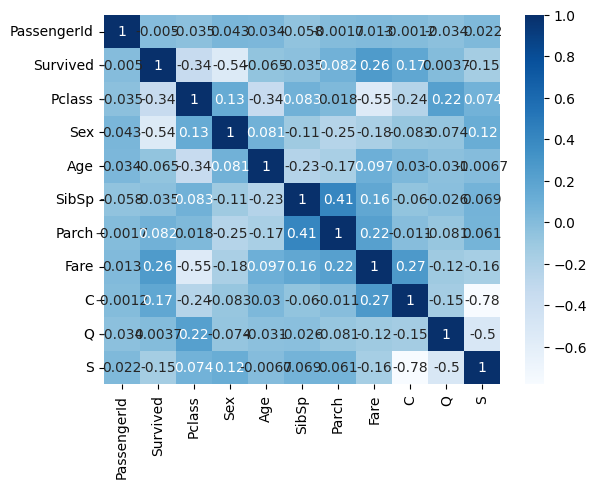

In [350]:
sns.heatmap(df.drop(columns=['Name','Ticket'],axis=1).corr(),annot = True , cmap = 'Blues')
plt.show()

In [351]:
df =df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Fare'],axis = 1)

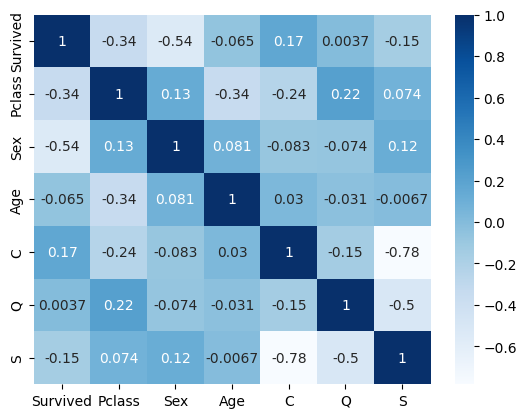

In [352]:
sns.heatmap(df.corr(),annot = True , cmap = 'Blues')
plt.show()

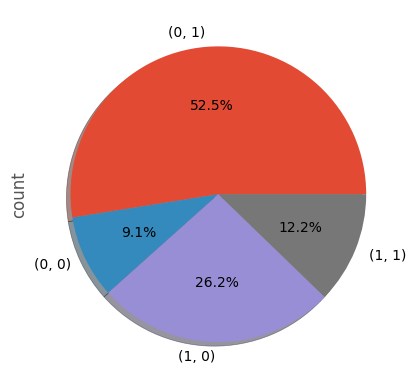

In [353]:
with plt.style.context ('ggplot'):

 df.groupby('Survived')['Sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%',shadow = True )

 plt.show()

As we can see a lot of males died in the titanic accident

In [354]:
sex_stats = df.groupby('Survived')['Sex'].value_counts()
sex_stats

Survived  Sex
0         1      468
          0       81
1         0      233
          1      109
Name: count, dtype: int64

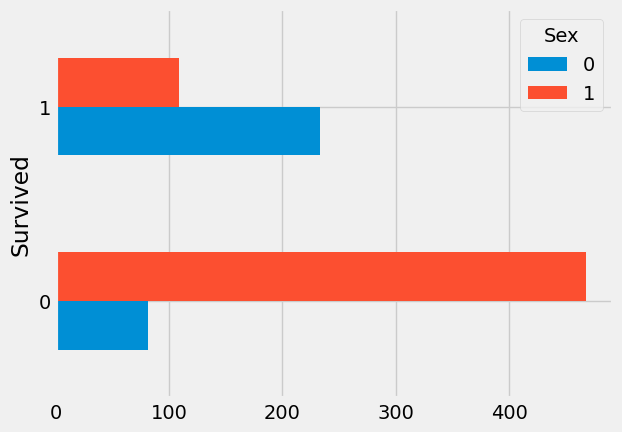

In [355]:
with plt.style.context ('fivethirtyeight'):
  sex_stats.unstack().plot(kind = 'barh',stacked = False)
  plt.show()

In [356]:
df.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: count, dtype: int64

Even if the Pclass 3 is 'better' a few people that were in this class survived

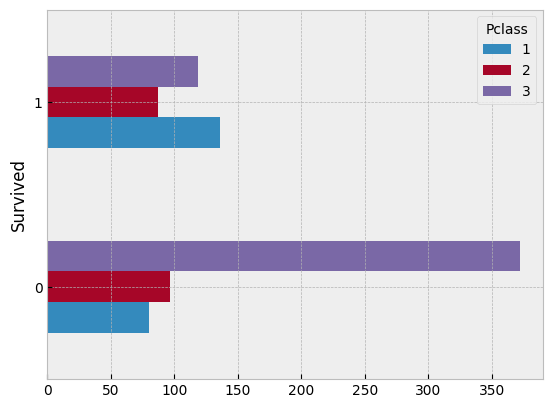

In [357]:
with plt.style.context ('bmh'):
 df.groupby('Survived')['Pclass'].value_counts().unstack().plot(kind = 'barh')
 plt.show()

# Training the model

In [358]:
df

,Survived,Pclass,Sex,Age,C,Q,S
0,0,3,1,22.0,0,0,1
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,1
3,1,1,0,35.0,0,0,1
4,0,3,1,35.0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,1
887,1,1,0,19.0,0,0,1
888,0,3,0,28.0,0,0,1
889,1,1,1,26.0,1,0,0


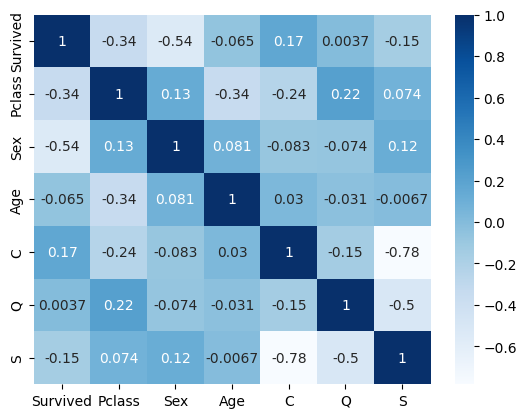

In [359]:
sns.heatmap(df.corr(),annot=True,cmap = 'Blues')
plt.show()

In [360]:
target_column = df['Survived']
df = df.drop('Survived',axis = 1)

In [361]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(df,target_column,test_size=0.2)

In [362]:
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((712, 6), (179, 6), (712,), (179,))

# Decision Tree Classifier

In [363]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as accuracy , precision_score as precision , recall_score as recall , f1_score as f1 , classification_report


clf = DecisionTreeClassifier().fit(x_train,y_train)
prediction = clf.predict(x_test)

print('Decision Tree Classifier')
print(classification_report(y_test,prediction))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       119
           1       0.71      0.70      0.71        60

    accuracy                           0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



# Random Forest Classifier

In [364]:
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier().fit(x_train,y_train)

pred = rfc.predict(x_test)

print('Random Forest Classifier')
print(classification_report(y_test,pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       119
           1       0.68      0.70      0.69        60

    accuracy                           0.79       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.79      0.79      0.79       179



# Gradient Boosting Classifier

In [365]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier().fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)

print("Gradient Boosting Classifier")
print(classification_report(y_test,gbc_pred))

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       119
           1       0.72      0.70      0.71        60

    accuracy                           0.81       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

